# Analisis de datos

El dataset a trabajar será **Credit Card Fraud Detection**.


*El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares europeos.
Este conjunto de datos presenta transacciones ocurridas en dos días, con **492** fraudes de un total de **284.807** transacciones. El conjunto de datos presenta un alto desequilibrio; la clase positiva (fraudes) representa el **0,172** % del total de transacciones.Contiene únicamente variables numéricas de entrada, resultado de una transformación PCA. Lamentablemente, por motivos de confidencialidad, no podemos proporcionar las características originales ni más información sobre los datos. Las características V1, V2, … V28 son los componentes principales obtenidos con PCA; las únicas características que no se han transformado con PCA son «Time(Tiempo)» y «Amount(Importe)». La característica «Tiempo» contiene los segundos transcurridos entre cada transacción y la primera transacción del conjunto de datos. La característica «Importe» es el importe de la transacción; esta característica puede utilizarse para el aprendizaje sensible a los costes basado en ejemplos. La característica «Clase» es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.* [https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud]

In [1]:
%load_ext autoreload

%autoreload 2

import sys
sys.path.append('../models')
sys.path.append('../utils')
sys.path.append('../../config')
from constants import *


In [2]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importar dataset
data = pd.read_csv(INITIAL_DATASET_ROUTE)

In [4]:
# Exploración inicial
print("---Información general---")
data.info()

print("--Distribución de clases---")
pos = data[data["Class"] == 1]
neg = data[data["Class"] == 0]

p_pos = len(pos) * 100 / len(data)
p_neg = len(neg) * 100 / len(data)

print(f"Total de no fraudes {len(pos)} ({p_pos}%)")
print(f"Total de fraudes {len(pos)} ({p_neg}%)")

print(f"Total de datos {len(data)}")

---Información general---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-nul

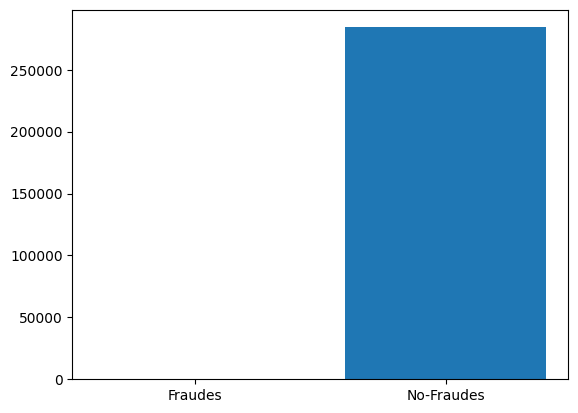

In [5]:
# Visualizar desbalance de Clases
plt.bar(["Fraudes", "No-Fraudes"], [len(pos), len(neg)])
plt.show()

In [6]:
pos["Amount"].to_numpy

<bound method IndexOpsMixin.to_numpy of 541         0.00
623       529.00
4920      239.93
6108       59.00
6329        1.00
           ...  
279863    390.00
280143      0.76
280149     77.89
281144    245.00
281674     42.53
Name: Amount, Length: 492, dtype: float64>

In [7]:
pos["Time"]

541          406.0
623          472.0
4920        4462.0
6108        6986.0
6329        7519.0
            ...   
279863    169142.0
280143    169347.0
280149    169351.0
281144    169966.0
281674    170348.0
Name: Time, Length: 492, dtype: float64

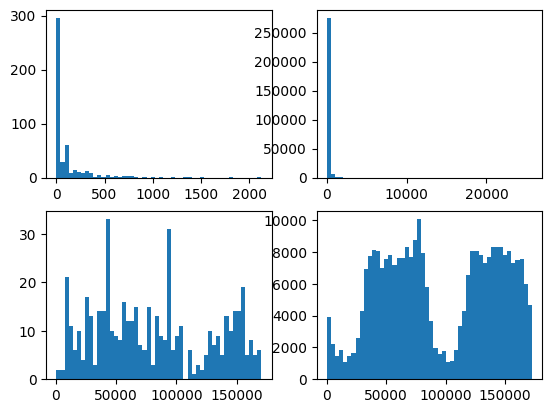

In [8]:
# Distribución de Amount y Time por clase
fig, axs = plt.subplots(2, 2)
nbins = 50
# Amount
axs[0][0].hist(pos["Amount"], bins=nbins)
axs[0][1].hist(neg["Amount"], bins=nbins)

# Time
axs[1][0].hist(pos["Time"], bins=nbins)
axs[1][1].hist(neg["Time"], bins=nbins)

plt.show()

La variable Amount no tiene una distribución enstrechamente relacionada con la clase, a diferencia de la variable Time la cual presenta claramente 2 rangos de tiempo en donde los casos de no-fraude (negativos) se encuentran concentrados, aunque esto puede deberse a la falta de datos  un rango de tiempo específico ya que el histograma  positivos vs tiempo no muestra una concentracion de casos específicas.

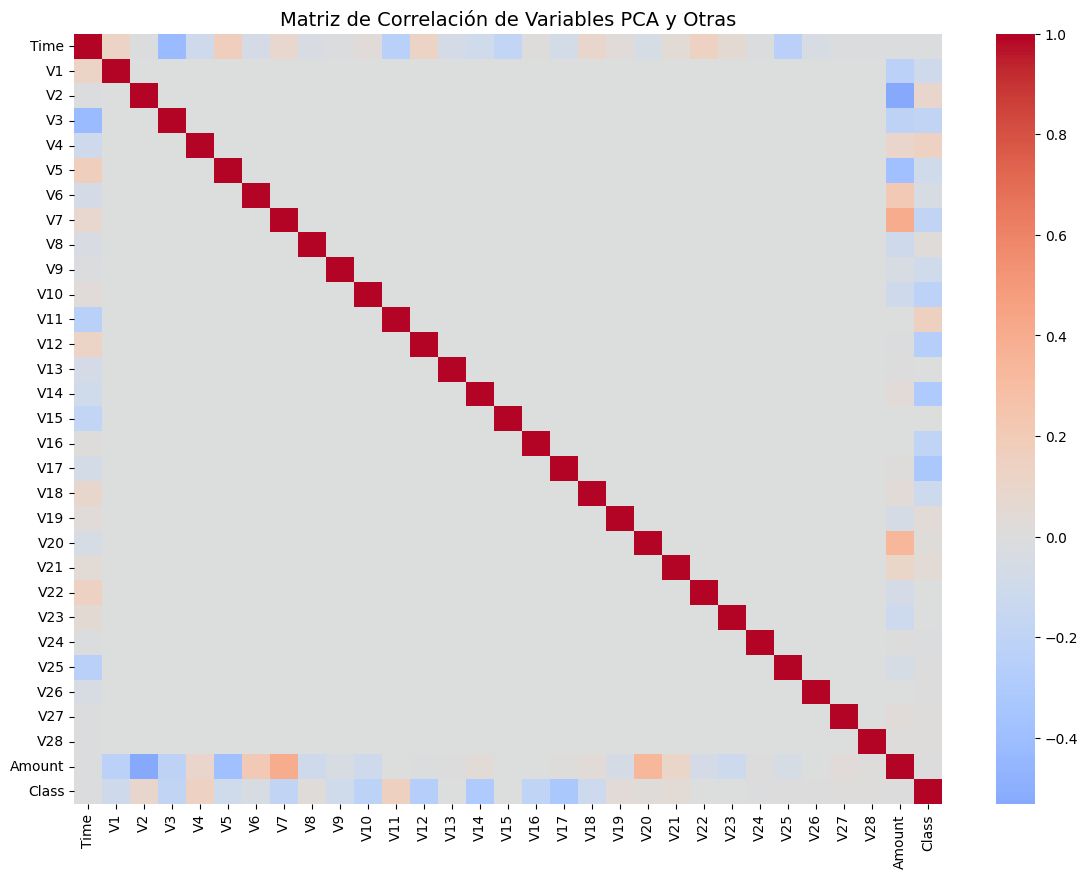

In [9]:
## Correlación entre las variables
corr = data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Matriz de Correlación de Variables PCA y Otras', fontsize=14)
plt.show()
